In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_1 =pd.read_csv('/content/diabetes.csv')

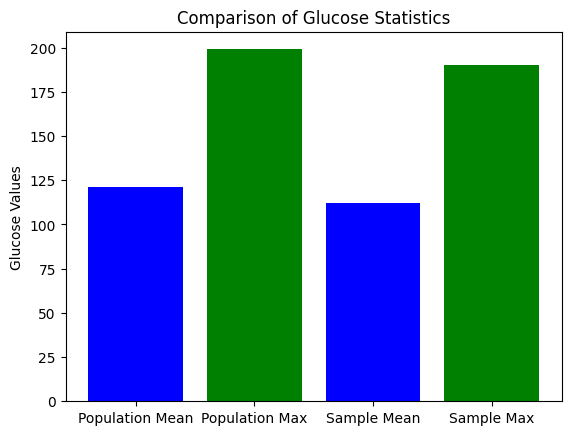

In [13]:

np.random.seed(930)


sample_1 = data.sample(25)

population_mean_glucose_1 = data_1['Glucose'].mean()
population_max_glucose_1 = data_1['Glucose'].max()

sample_mean_glucose_1 = sample_1['Glucose'].mean()
sample_max_glucose_1 = sample_1['Glucose'].max()


# Create a bar chart for comparison
labels_1 = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values_1 = [population_mean_glucose_1, population_max_glucose_1, sample_mean_glucose_1, sample_max_glucose_1]

plt.bar(labels_1, values_1, color=['blue', 'green', 'blue', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()


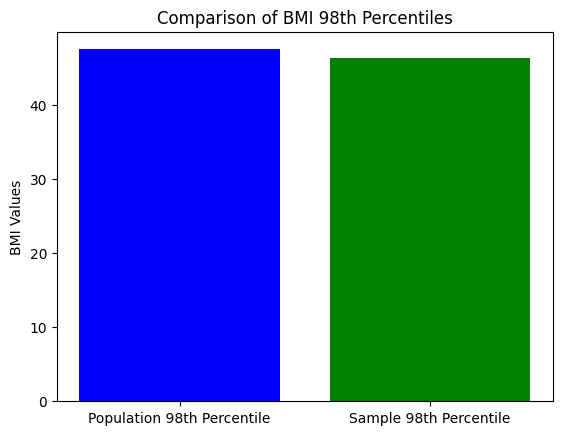

In [14]:
population_percentile_1 = np.percentile(data_1['BMI'], 98)
sample_percentile_1 = np.percentile(sample_1['BMI'], 98)

labels_2 = ['Population 98th Percentile', 'Sample 98th Percentile']
values_2 = [population_percentile_1, sample_percentile_1]

plt.bar(labels_2, values_2, color=['blue', 'green'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [15]:

bootstrap_samples_1 = 500
sample_size_1 = 150


bootstrap_means_1 = np.zeros(bootstrap_samples_1)
bootstrap_std_devs_1 = np.zeros(bootstrap_samples_1)
bootstrap_percentiles_1 = np.zeros(bootstrap_samples_1)


for i in range(bootstrap_samples_1):
    bootstrap_sample_1 = data_1['BloodPressure'].sample(sample_size_1, replace=True)
    bootstrap_means_1[i] = bootstrap_sample_1.mean()
    bootstrap_std_devs_1[i] = bootstrap_sample_1.std()
    bootstrap_percentiles_1[i] = np.percentile(bootstrap_sample_1, 98)


population_mean_1 = data_1['BloodPressure'].mean()
population_std_dev_1 = data_1['BloodPressure'].std()
population_percentile_1 = np.percentile(data_1['BloodPressure'], 98)


bmean_1=np.mean(bootstrap_means_1)
bsd_1=np.mean(bootstrap_std_devs_1)
bp_1=np.mean(bootstrap_percentiles_1)


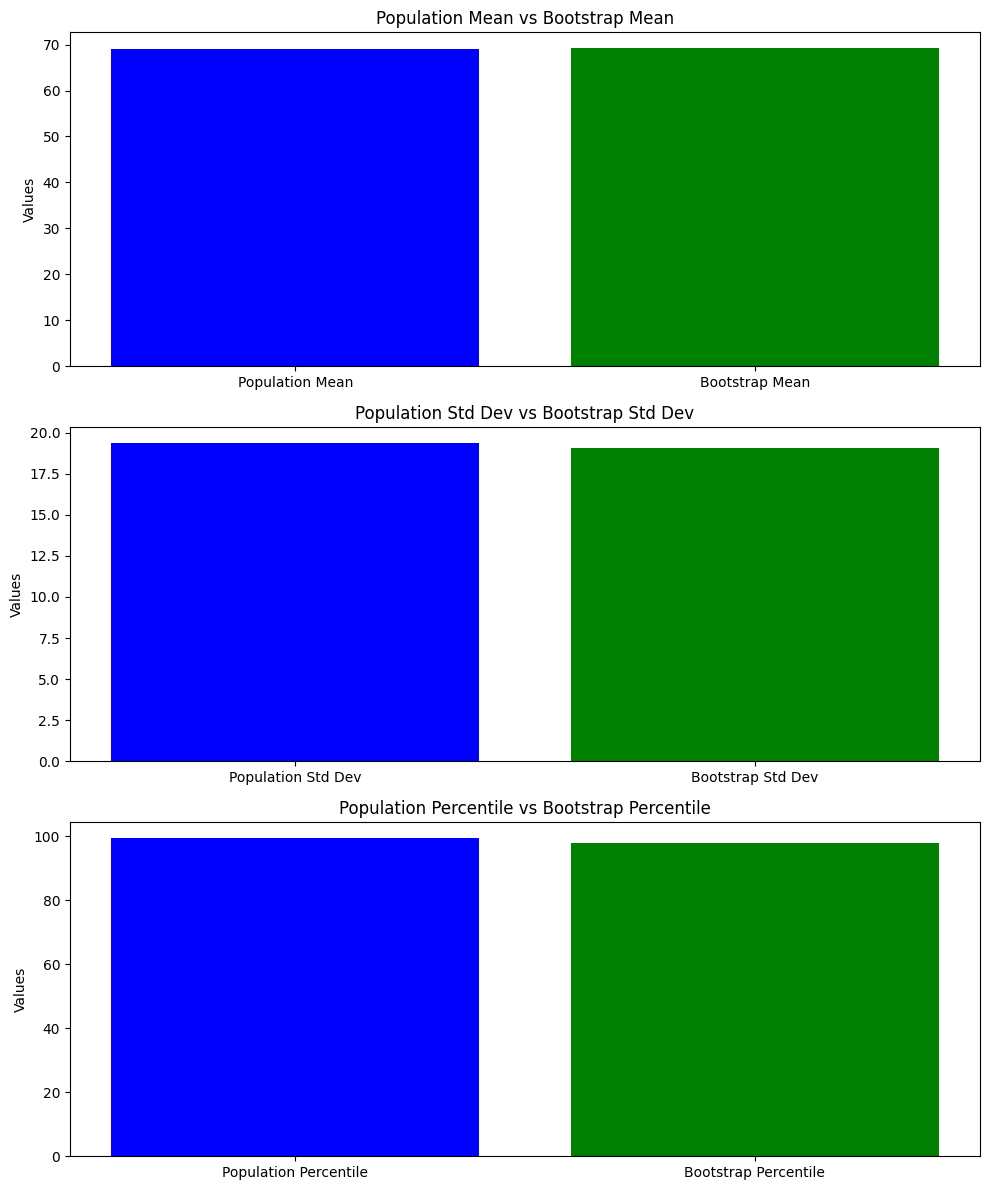

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean_1, bmean_1], color=['blue', 'green'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev_1, bsd_1], color=['blue', 'green'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile_1, bp_1], color=['blue', 'green'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()